**2023 La Serena School Data Science**
#  CNN with Keras


*N. Hernitschek, 2023*


This Jupyter notebook gives an intro to Convolutional Neural Networks.
Also, here we use Keras as a professional neural network library.



---
## Contents

* [Using professional Neural Network Libraries ](#first-bullet)
* [MNIST with Keras Visualization](#second-bullet)
* [Summary](#third-bullet)


## 1. Using professional Neural Network Libraries <a class="anchor" id="first-bullet"></a>


Commonly used software frameworks to work with Neural Networks include such as PyTorch and Tensorflow/ Keras.

For your project as part of this course, you can use whichever framework you want to use.
We will use here Tensorflow/ Keras.


### TensorFlow

https://www.tensorflow.org/



TensorFlow is tested and supported on the following 64-bit systems:

*    Python 3.7–3.10
*    Ubuntu 16.04 or later
*    Windows 7 or later (with C++ redistributable)
*    macOS 10.12.6 (Sierra) or later (no GPU support)
*    WSL2 via Windows 10 19044 or higher including GPUs (Experimental)


The installation guide can be found here:
https://www.tensorflow.org/install


TensorFlow can also be used on Google Colab (for testing purposes):
Run the TensorFlow tutorials directly, without any installation, in the browser with Colaboratory, a Google research project created to help disseminate machine learning education and research. It's a Jupyter notebook environment that requires no setup to use and runs entirely in the cloud.

https://www.tensorflow.org/tutorials

The TensorFlow tutorials are written as Jupyter notebooks and run directly in Google Colab. Just click the Run in Google Colab button. 


https://www.tensorflow.org/tutorials/quickstart/beginner




# 2. MNIST with Keras Visualization <a class="anchor" id="second-bullet"></a>

(adapted from https://www.kaggle.com/code/ernie55ernie/mnist-with-keras-visualization-and-saliency-map)
    


This notebook contains the basic usage of keras and sklearn on the MNIST data set.
The four steps are:

1. Stratified shuffling split on training data set
2. Training and validating a CNN
3. plotting a confusion matrix
4. visualizing the convolution filters


There are 2 outputs

 *   Prediction csv on testing data
 *   Keras model


Before starting the code, download the files `test.csv` and `train.csv` from the above website.

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# read input csv file
train_df = pd.read_csv('./mnist_train.csv')
test_df = pd.read_csv('./mnist_test.csv')


In [4]:
X_train = []
Y_train = []
X_test = []

# reshape training data from rows into images
for index, row in train_df.iterrows():
    X_train.append(row.values[1 : ].reshape((28, 28, 1)))
    Y_train.append(row['label'])

# reshape testing data from rows into images
for index, row in test_df.iterrows():
    X_test.append(row.values.reshape((28, 28, 1)))

# normalization
X_train = np.array(X_train) / 255.
Y_train = np.array(Y_train)
X_test = np.array(X_test) / 255.

print('There are', X_train.shape[0], 'training data and', X_test.shape[0], 'testing data')
print('Number of occurence for each number in training data (0 stands for 10):')
print(np.vstack((np.unique(Y_train), np.bincount(Y_train))).T)


There are 42000 training data and 28000 testing data
Number of occurence for each number in training data (0 stands for 10):
[[   0 4132]
 [   1 4684]
 [   2 4177]
 [   3 4351]
 [   4 4072]
 [   5 3795]
 [   6 4137]
 [   7 4401]
 [   8 4063]
 [   9 4188]]


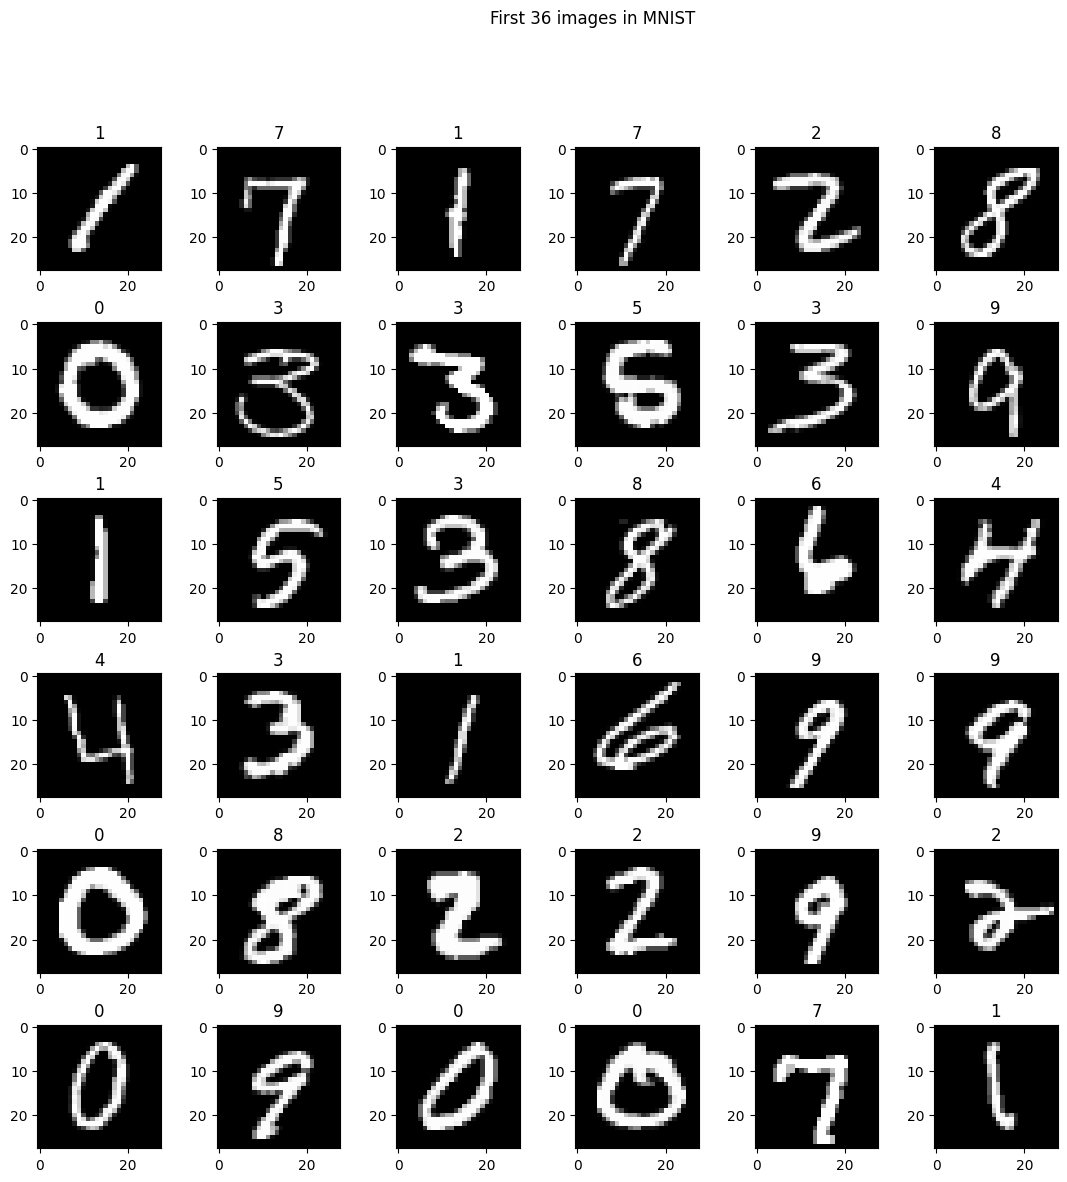

In [5]:
# plot first 36 images in MNIST
fig, ax = plt.subplots(6, 6, figsize = (12, 12))
fig.suptitle('First 36 images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(6) for j in range(6)]:
    ax[x, y].imshow(X_train[x + y * 6].reshape((28, 28)), cmap = 'gray')
    ax[x, y].set_title(Y_train[x + y * 6])

### Strattified Shuffle Splot

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing

# transform training label to one-hot encoding
lb = preprocessing.LabelBinarizer()
lb.fit(Y_train)
Y_train = lb.transform(Y_train)

# split training and validating data
print('Stratified shuffling...')
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state = 15)
for train_idx, val_idx in sss.split(X_train, Y_train):
    X_train_tmp, X_val = X_train[train_idx], X_train[val_idx]
    Y_train_tmp, Y_val = Y_train[train_idx], Y_train[val_idx]

X_train = X_train_tmp
Y_train = Y_train_tmp
print('Finish stratified shuffling...')

Stratified shuffling...
Finish stratified shuffling...


You might need to install keras and tensorflow.


**Caution:** In case you encounter errors, often incompatibility of the certain libraries is the reason for that.
I suggest googling for that, and a combination of libraries that usually works can be installed like


`pip3 install tensorflow==2.12.0`
`pip install numpy==1.23`

I suggest after installing the libraries accordingly, try an import at the terminal window, and if `import keras`is sucessful: restart the Jupyter kernel and try whether it works in the Jupyter notebook.


In [7]:
import tensorflow as tf

In [11]:
tf.__version__

'2.10.1'

In [6]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

img_size = (28, 28, 1)
n_classes = 10

if os.path.exists('keras_model.h5'):
    print('Loading model...')
    model = load_model('keras_model.h5')
else:
    print('Building model...')
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape = img_size, kernel_initializer = 'normal'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(64, (5, 5), kernel_initializer = 'normal'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes))
    model.add(Activation('softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

Loading model...


TypeError: weight_decay is not a valid argument, kwargs should be empty  for `optimizer_experimental.Optimizer`.

In [13]:
# data augmentation
datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    zca_whitening = False,
    rotation_range = 0,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = False,
    vertical_flip = False
)

datagen.fit(X_train)

In contrast to our own CNN code from 1., this runs ways faster. You can safely execute this now; it should take about 15 minutes.

In [14]:
print('Training model...')
model.fit_generator(datagen.flow(X_train, Y_train, batch_size = 1000),
                   epochs = 20,
                   validation_data = (X_val, Y_val),
                   steps_per_epoch = X_train.shape[0] / 1000,
                   verbose = 1)
print('Validating model...')
score, acc = model.evaluate(X_val, Y_val, verbose = 1)
print('\nLoss:', score, '\nAcc:', acc)
model.save('keras_model.h5')

Training model...


/tmp/ipykernel_3811334/1702920462.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(X_train, Y_train, batch_size = 1000),


Epoch 1/20


2023-04-17 19:53:58.935896: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-04-17 19:54:00.415012: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 73728000 exceeds 10% of free system memory.
2023-04-17 19:54:01.118686: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 73728000 exceeds 10% of free system memory.



 1/33 [..............................] - ETA: 1:22 - loss: 2.3222 - accuracy: 0.1020

2023-04-17 19:54:01.517652: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 73728000 exceeds 10% of free system memory.
2023-04-17 19:54:02.074646: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 73728000 exceeds 10% of free system memory.



 2/33 [>.............................] - ETA: 31s - loss: 2.2926 - accuracy: 0.1245 

2023-04-17 19:54:02.510527: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 73728000 exceeds 10% of free system memory.


33/33 [==============================] - 35s 1s/step - loss: 1.5003 - accuracy: 0.4906 - val_loss: 0.4782 - val_accuracy: 0.8645
Epoch 2/20
33/33 [==============================] - 35s 1s/step - loss: 0.7296 - accuracy: 0.7721 - val_loss: 0.1914 - val_accuracy: 0.9488
Epoch 3/20
33/33 [==============================] - 34s 991ms/step - loss: 0.4825 - accuracy: 0.8523 - val_loss: 0.1419 - val_accuracy: 0.9599
Epoch 4/20
33/33 [==============================] - 34s 1s/step - loss: 0.3571 - accuracy: 0.8908 - val_loss: 0.1062 - val_accuracy: 0.9699
Epoch 5/20
33/33 [==============================] - 35s 1s/step - loss: 0.3003 - accuracy: 0.9072 - val_loss: 0.1083 - val_accuracy: 0.9669
Epoch 6/20
33/33 [==============================] - 45s 1s/step - loss: 0.2498 - accuracy: 0.9255 - val_loss: 0.0833 - val_accuracy: 0.9740
Epoch 7/20
33/33 [==============================] - 41s 1s/step - loss: 0.2206 - accuracy: 0.9343 - val_loss: 0.0954 - val_accuracy: 0.9712
Epoch 8/20
33/33 [==========

In [15]:
print('Predicting...')
Y_test = model.predict(X_test)
Y_test = lb.inverse_transform(Y_test)
Y_test = [[y] for y in Y_test]
index = [[i] for i in range(1, X_test.shape[0] + 1)]
output_np = np.concatenate((index, Y_test), axis = 1)
output_df = pd.DataFrame(data = output_np, columns = ['ImageId', 'Label'])
output_df.to_csv('out.csv', index = False)

Predicting...
875/875 [==============================] - 7s 8ms/step


263/263 [==============================] - 2s 8ms/step


Text(0.5, 21.34715460257995, 'Predicted label')

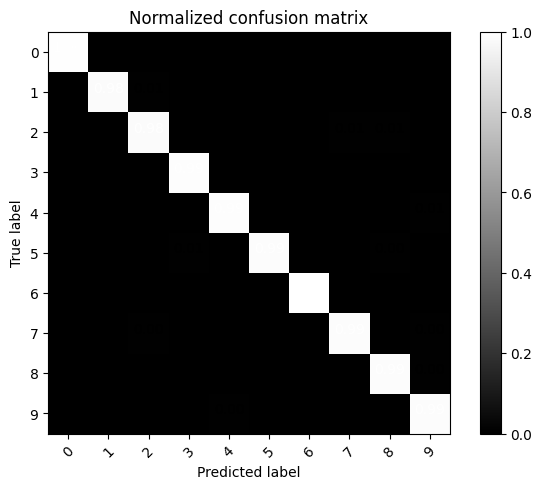

In [16]:
from sklearn.metrics import confusion_matrix
import itertools

Y_pred = model.predict(X_val)
Y_val_pred = lb.inverse_transform(Y_pred)
Y_val_real = lb.inverse_transform(Y_val)
cm = confusion_matrix(Y_val_real, Y_val_pred)
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

# print(cm)
plt.imshow(cm, cmap = 'gray')
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, np.arange(n_classes), rotation=45)
plt.yticks(tick_marks, np.arange(n_classes))

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

The confusion matrix looks great! In case you don't remember its purpose, look it up.

In [25]:
# Visualizating filters
# https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html
from keras import backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

K.set_learning_phase(1)
import tensorflow as tf

model = load_model('keras_model.h5')

layer_dict = dict([(layer.name, layer) for layer in model.layers])
#print('Layer dict', layer_dict)
print(model.summary())

2023-04-17 20:16:10.303780: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2023-04-17 20:16:10.378859: W tensorflow/c/c_api.cc:300] Operation '{name:'dense_1/bias/Assign' id:112 op device:{requested: '', assigned: ''} def:{{{node dense_1/bias/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_1/bias, dense_1/bias/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 activation (Activation)     (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 activation_1 (Activation)   (None, 8, 8, 64)          0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                    

2023-04-17 20:16:20.149690: W tensorflow/c/c_api.cc:300] Operation '{name:'total/Assign' id:165 op device:{requested: '', assigned: ''} def:{{{node total/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](total, total/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


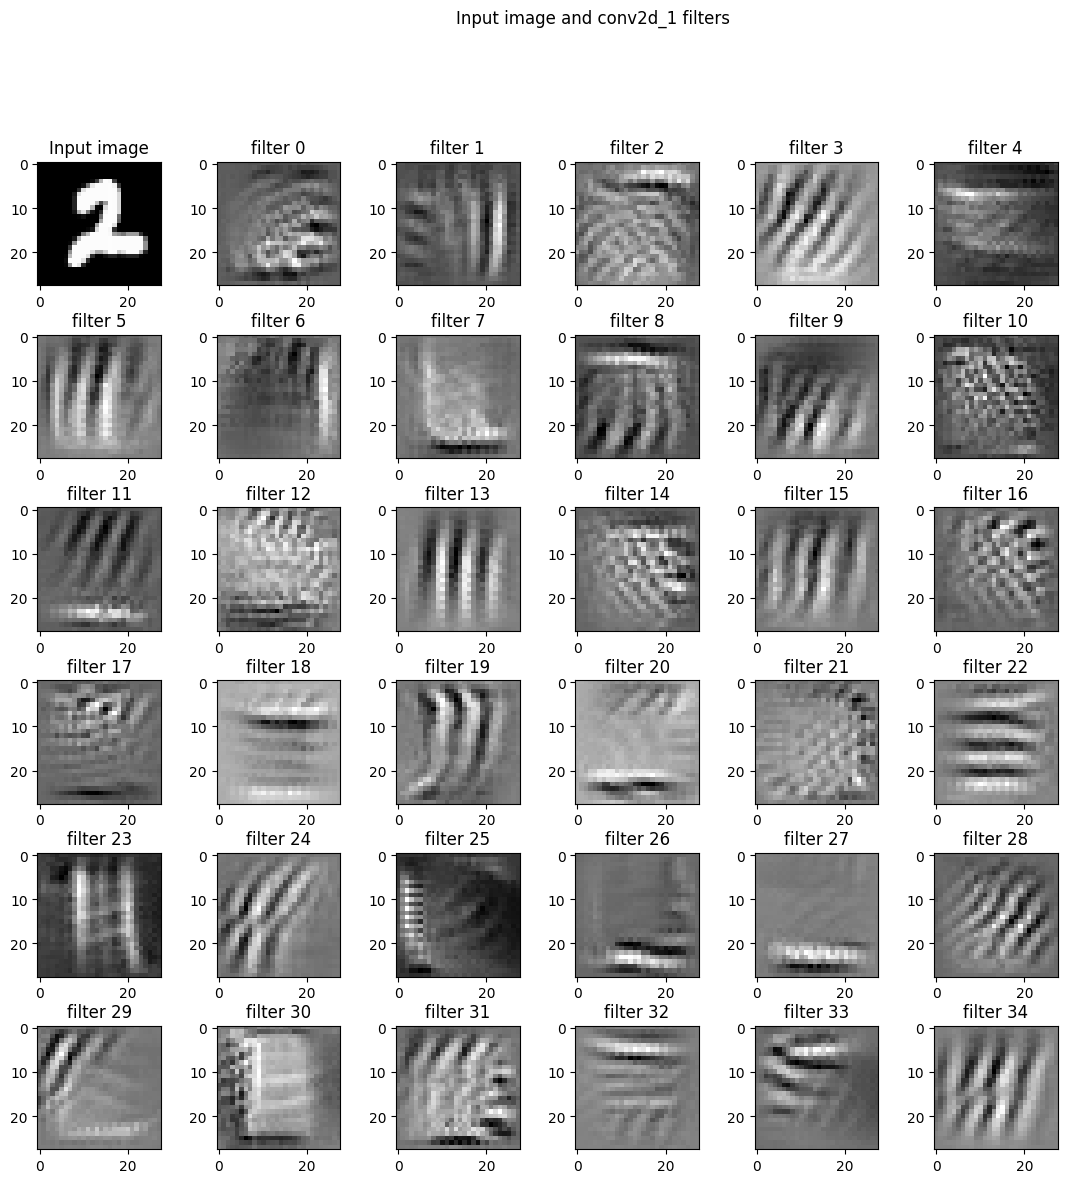

In [26]:


# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[0]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]
        
        #grads = K.GradientTape(loss, model.input)[0]
        
        

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

The above **Feature Visualization** translates the internal features present in an image into visually perceptible or recognizable image patterns. This helps us in understanding the learned features explicitly.

CNN uses learned filters to convolve the feature maps from the previous layer. Filters are two-dimensional weights and these weights have a spatial relationship with each other.

## 3. Summary <a class="anchor" id="sixth-bullet"></a>

At this point, all of you should have:
* a running keras/tensorflow installation
* first experience with building a neural network with keras/tensorflow and how to visualize it




